In [1]:
#import ML4PS as ml
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os

%load_ext autoreload
%autoreload 2

import sys; sys.path.insert(0, '..')
import ML4PS as ml

In [3]:
from ML4PS.backend.pandapower import Backend as PandaPowerBackend

In [4]:
PandaPowerBackend

ML4PS.backend.pandapower.Backend

# Choose dataset

In [5]:
data_dir = '../data/data_json/case14/train'

# Defining a series of normalizing functions

The features contained in power systems objects may have very different orders of magnitude and display complex distributions with possibly multiple modes. For this reason, it is very important to build a series of functions that can convert those atypical distributions into something that looks more like a uniform law between $-1$ and $1$.

This normalization process is done by computing a piecewise linear approximation of the cumulative distribution function of each required feature. This estimation is performed by considering a subset of the trainset. This estimation does not need to be perfect, so it seems reasonable to estimate it over a reasonably small amount of samples (see option *amount_of_samples*).

In [6]:
normalizer = ml.Normalizer(data_dir = data_dir, backend_name = 'pandapower')
normalizer.save('normalizer.pkl')

Importing power grid instances: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.66it/s]


# Defining an interface

In order to have our neural network learn, we have to pass it multiple batches of instances of power grids. The interface has three iterators (train, val and test) that can iterate over the whole dataset defined in *data_dir*, and return inputs $a$ and $x$ that will be read by the neural network, and a series of pypowsybl networks instances.

As some people may be interested in dealing with time series, we have included the possibility of considering rolling windows. The attribute *series_length* defines the time coherence of time series, while *time_window* defines the size of the time windows that the iterator should retrieve. The different snapshots of a time windows are aggregated by concatenating their respective features. By default, we consider that we are not interested in time series.

In [19]:
data_dir = '../data/data_json/case1354pegase'

In [20]:
#train_set = ml.Dataset(data_dir=data_dir+'/train', backend=backend, batch_size=10)

In [24]:
interface = ml.Interface(data_dir = data_dir,
    backend_name = 'pandapower', batch_size = 10)

In the following we propose to show what our data looks like. Notice that $a$ and $x$ are nested dictionnaries, whose values have a shape [n_batch, n_obj, time_window], where n_obj is the amount of objects of the considered class. $a$ contains addresses (integers), while $x$ contains features (float).

In [25]:
a, x, nets = next(iter(interface.train))
print("keys in a :{}".format(list(a.keys())))
print("keys in a['gen'] :{}".format(list(a['gen'].keys())))
print("values in a['gen']['name'] :{}".format(a['gen']['name']))
print("")
print("keys in x :{}".format(list(x.keys())))
print("keys in x['gen'] :{}".format(list(x['gen'].keys())))
print("values in x['gen']['p_mw'] :{}".format(x['gen']['p_mw']))

['../data/data_json/case1354pegase/train/sample_02594.json', '../data/data_json/case1354pegase/train/sample_04316.json', '../data/data_json/case1354pegase/train/sample_05695.json', '../data/data_json/case1354pegase/train/sample_00539.json', '../data/data_json/case1354pegase/train/sample_05783.json', '../data/data_json/case1354pegase/train/sample_06599.json', '../data/data_json/case1354pegase/train/sample_06238.json', '../data/data_json/case1354pegase/train/sample_00755.json', '../data/data_json/case1354pegase/train/sample_02667.json', '../data/data_json/case1354pegase/train/sample_03969.json']
keys in a :['bus', 'load', 'sgen', 'gen', 'shunt', 'ext_grid', 'line', 'trafo', 'poly_cost']
keys in a['gen'] :['bus', 'name']
values in a['gen']['name'] :[[1355 1356 1467 ... 1530 1531 1532]
 [1355 1356 1467 ... 1530 1531 1532]
 [1355 1356 1467 ... 1530 1531 1532]
 ...
 [1355 1356 1467 ... 1530 1531 1532]
 [1355 1356 1467 ... 1530 1531 1532]
 [1355 1356 1467 ... 1530 1531 1532]]

keys in x :['bu

In [26]:
import tqdm
for a, x, nets in tqdm.tqdm(interface.train):
    print('test')

  0%|                                                                                                                                                                                                                                                                                           | 0/699 [00:00<?, ?it/s]

['../data/data_json/case1354pegase/train/sample_02124.json', '../data/data_json/case1354pegase/train/sample_06012.json', '../data/data_json/case1354pegase/train/sample_05339.json', '../data/data_json/case1354pegase/train/sample_04659.json', '../data/data_json/case1354pegase/train/sample_04104.json', '../data/data_json/case1354pegase/train/sample_05441.json', '../data/data_json/case1354pegase/train/sample_00379.json', '../data/data_json/case1354pegase/train/sample_06634.json', '../data/data_json/case1354pegase/train/sample_02558.json', '../data/data_json/case1354pegase/train/sample_06081.json']


  0%|▍                                                                                                                                                                                                                                                                                  | 1/699 [00:03<40:57,  3.52s/it]

test
['../data/data_json/case1354pegase/train/sample_03860.json', '../data/data_json/case1354pegase/train/sample_06005.json', '../data/data_json/case1354pegase/train/sample_00382.json', '../data/data_json/case1354pegase/train/sample_04454.json', '../data/data_json/case1354pegase/train/sample_04802.json', '../data/data_json/case1354pegase/train/sample_01180.json', '../data/data_json/case1354pegase/train/sample_02032.json', '../data/data_json/case1354pegase/train/sample_05936.json', '../data/data_json/case1354pegase/train/sample_06365.json', '../data/data_json/case1354pegase/train/sample_03597.json']


  0%|▊                                                                                                                                                                                                                                                                                  | 2/699 [00:07<41:22,  3.56s/it]

test
['../data/data_json/case1354pegase/train/sample_06640.json', '../data/data_json/case1354pegase/train/sample_02661.json', '../data/data_json/case1354pegase/train/sample_00398.json', '../data/data_json/case1354pegase/train/sample_00146.json', '../data/data_json/case1354pegase/train/sample_05062.json', '../data/data_json/case1354pegase/train/sample_00122.json', '../data/data_json/case1354pegase/train/sample_00230.json', '../data/data_json/case1354pegase/train/sample_01932.json', '../data/data_json/case1354pegase/train/sample_01752.json', '../data/data_json/case1354pegase/train/sample_05602.json']


KeyboardInterrupt: 

In [15]:
x['load']['p_mw']

TypeError: 'NoneType' object is not subscriptable

In [33]:
x_norm = normalizer(x)

In [34]:
x_norm['load']['p_mw']

array([[[ 0.41319926],
        [ 0.86564262],
        [ 0.26190077],
        [-0.91491096],
        [-0.14990964],
        [ 0.29588008],
        [-0.88841138],
        [-1.00382769],
        [-0.62889367],
        [-0.31832635],
        [ 0.1254308 ]],

       [[ 0.34001286],
        [ 0.81025789],
        [ 0.60878047],
        [-0.73474687],
        [-0.8296626 ],
        [ 0.05630127],
        [-0.43979885],
        [-0.88757891],
        [-0.70210819],
        [-0.63550201],
        [ 0.12800796]],

       [[ 0.4711457 ],
        [ 0.93994418],
        [ 0.78644627],
        [-0.71100454],
        [ 0.00980433],
        [ 0.69414886],
        [-0.73212697],
        [-0.71541054],
        [-0.77952745],
        [-0.41071125],
        [ 0.26753284]],

       [[ 0.32286697],
        [ 0.7300015 ],
        [ 0.36129438],
        [-0.58794234],
        [-0.10177924],
        [ 0.26110337],
        [-0.47838977],
        [-0.98561316],
        [-0.59258809],
        [-0.63734643],
     

In [36]:
raw_data = np.reshape(x['load']['p_mw'], [-1])
norm_data = np.reshape(x_norm['load']['p_mw'], [-1])

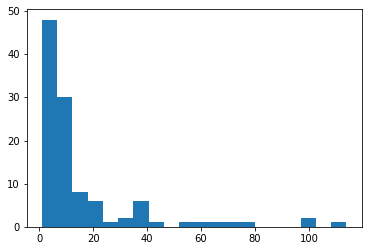

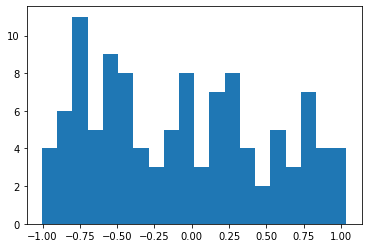

In [41]:
plt.hist(raw_data, bins=20)
plt.show()

plt.hist(norm_data, bins=20)
plt.show()

# Pytorch data

In [6]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandapower.networks as pn

class MyDataset(Dataset):
    def __init__(self, backend_name, data_dir, addresses=None, features=None):
        self.backend = ml.backend.get_backend(backend_name)
        self.files = self.backend.get_files(data_dir)
        if addresses is None:
            self.addresses = self.backend.valid_addresses
        else:
            self.addresses = addresses
        if features is None:
            self.features = self.backend.valid_features
        else:
            self.features = features
        
        
    def __getitem__(self, index):
        filename = self.files[index]
        network = self.backend.load_network(filename)
        a_table = self.backend.get_table_dict(network, self.addresses)
        a = self.backend.extract_addresses(a_table, self.addresses)
        x_table = self.backend.get_table_dict(network, self.features)
        x = self.backend.extract_features(x_table, self.features)
        return a, x, network
    
    def __len__(self):
        return len(self.files)

def collate_fn(data):
    a, x, network = zip(*data)
    a = torch.utils.data.default_collate(a)
    x = torch.utils.data.default_collate(x)
    return a, x, network

data_dir = '../data/data_json/case1354pegase/train'
dataset = MyDataset('pandapower', data_dir)
loader = DataLoader(
    dataset,
    batch_size=10,
    collate_fn=collate_fn,
    num_workers=0
)


In [34]:
import tqdm

for a, x, nets in tqdm.tqdm(loader):
    print('test')

  0%|▎                                                                                                                                                                                                                                                                                  | 1/776 [00:03<41:49,  3.24s/it]

test


  0%|▋                                                                                                                                                                                                                                                                                  | 2/776 [00:06<43:21,  3.36s/it]

test


  0%|█                                                                                                                                                                                                                                                                                  | 3/776 [00:11<51:11,  3.97s/it]

test


  1%|█▍                                                                                                                                                                                                                                                                                 | 4/776 [00:16<54:55,  4.27s/it]

test


  1%|█▊                                                                                                                                                                                                                                                                                 | 5/776 [00:20<53:07,  4.13s/it]

test


  1%|██▏                                                                                                                                                                                                                                                                                | 6/776 [00:23<51:30,  4.01s/it]

test


  1%|██▍                                                                                                                                                                                                                                                                                | 7/776 [00:27<48:58,  3.82s/it]

test


  1%|██▊                                                                                                                                                                                                                                                                                | 8/776 [00:30<48:07,  3.76s/it]

test


  1%|███▏                                                                                                                                                                                                                                                                               | 9/776 [00:34<48:02,  3.76s/it]

test


  1%|███▌                                                                                                                                                                                                                                                                              | 10/776 [00:37<46:00,  3.60s/it]

test


  1%|███▉                                                                                                                                                                                                                                                                              | 11/776 [00:41<44:48,  3.51s/it]

test


  2%|████▏                                                                                                                                                                                                                                                                             | 12/776 [00:44<44:15,  3.48s/it]

test


  2%|████▌                                                                                                                                                                                                                                                                             | 13/776 [00:47<43:47,  3.44s/it]

test


  2%|████▉                                                                                                                                                                                                                                                                             | 14/776 [00:51<42:50,  3.37s/it]

test


  2%|█████▎                                                                                                                                                                                                                                                                            | 15/776 [00:54<42:15,  3.33s/it]

test


  2%|█████▋                                                                                                                                                                                                                                                                            | 16/776 [00:57<42:43,  3.37s/it]

test


  2%|██████                                                                                                                                                                                                                                                                            | 17/776 [01:01<42:19,  3.35s/it]

test


  2%|██████▎                                                                                                                                                                                                                                                                           | 18/776 [01:04<41:46,  3.31s/it]

test


  2%|██████▋                                                                                                                                                                                                                                                                           | 19/776 [01:07<41:20,  3.28s/it]

test


  3%|███████                                                                                                                                                                                                                                                                           | 20/776 [01:10<41:06,  3.26s/it]

test


  3%|███████▍                                                                                                                                                                                                                                                                          | 21/776 [01:14<40:56,  3.25s/it]

test


  3%|███████▊                                                                                                                                                                                                                                                                          | 22/776 [01:17<41:54,  3.34s/it]

test


  3%|████████                                                                                                                                                                                                                                                                          | 23/776 [01:21<42:54,  3.42s/it]

test


  3%|████████▍                                                                                                                                                                                                                                                                         | 24/776 [01:25<45:46,  3.65s/it]

test


  3%|████████▊                                                                                                                                                                                                                                                                         | 25/776 [01:28<43:35,  3.48s/it]

test


  3%|█████████▏                                                                                                                                                                                                                                                                        | 26/776 [01:31<42:15,  3.38s/it]

test


  3%|█████████▌                                                                                                                                                                                                                                                                        | 27/776 [01:34<41:22,  3.31s/it]

test


  4%|█████████▉                                                                                                                                                                                                                                                                        | 28/776 [01:37<40:28,  3.25s/it]

test


  4%|██████████▏                                                                                                                                                                                                                                                                       | 29/776 [01:40<40:01,  3.21s/it]

test


  4%|██████████▌                                                                                                                                                                                                                                                                       | 30/776 [01:44<40:22,  3.25s/it]

test


  4%|██████████▉                                                                                                                                                                                                                                                                       | 31/776 [01:47<39:48,  3.21s/it]

test


  4%|███████████▎                                                                                                                                                                                                                                                                      | 32/776 [01:50<39:32,  3.19s/it]

test


  4%|███████████▋                                                                                                                                                                                                                                                                      | 33/776 [01:53<39:31,  3.19s/it]

test


  4%|████████████                                                                                                                                                                                                                                                                      | 34/776 [01:56<39:17,  3.18s/it]

test


  5%|████████████▎                                                                                                                                                                                                                                                                     | 35/776 [01:59<38:57,  3.15s/it]

test


  5%|████████████▋                                                                                                                                                                                                                                                                     | 36/776 [02:03<38:39,  3.13s/it]

test


  5%|█████████████                                                                                                                                                                                                                                                                     | 37/776 [02:06<40:59,  3.33s/it]

test


  5%|█████████████▍                                                                                                                                                                                                                                                                    | 38/776 [02:10<42:08,  3.43s/it]

test


  5%|█████████████▊                                                                                                                                                                                                                                                                    | 39/776 [02:13<42:13,  3.44s/it]

test


  5%|██████████████                                                                                                                                                                                                                                                                    | 40/776 [02:17<43:07,  3.52s/it]

test


  5%|██████████████▍                                                                                                                                                                                                                                                                   | 41/776 [02:20<42:05,  3.44s/it]

test


  5%|██████████████▊                                                                                                                                                                                                                                                                   | 42/776 [02:24<41:15,  3.37s/it]

test


  6%|███████████████▏                                                                                                                                                                                                                                                                  | 43/776 [02:27<41:33,  3.40s/it]

test


  6%|███████████████▌                                                                                                                                                                                                                                                                  | 44/776 [02:31<43:47,  3.59s/it]

test


  6%|███████████████▉                                                                                                                                                                                                                                                                  | 45/776 [02:36<49:17,  4.05s/it]

test


  6%|███████████████▉                                                                                                                                                                                                                                                                  | 45/776 [02:39<43:04,  3.54s/it]


KeyboardInterrupt: 

In [18]:
net = pn.case14()

In [19]:
net

This pandapower network includes the following parameter tables:
   - bus (14 elements)
   - load (11 elements)
   - gen (4 elements)
   - shunt (1 element)
   - ext_grid (1 element)
   - line (15 elements)
   - trafo (5 elements)
   - poly_cost (5 elements)
   - bus_geodata (14 elements)

In [25]:
data = [['a', 'b'], ['c', 'd'], ['c', 'd']]

In [26]:
a, b = zip(*data)

In [32]:
data_ = zip(a,b)

In [33]:
data_

In [46]:
backend_name = 'pandapower'
backend = ml.backend.get_backend(backend_name)

In [48]:
backend.get_files(data_dir)

[['../data/data_json/case14/train/sample_00000.json'],
 ['../data/data_json/case14/train/sample_00001.json'],
 ['../data/data_json/case14/train/sample_00002.json'],
 ['../data/data_json/case14/train/sample_00003.json'],
 ['../data/data_json/case14/train/sample_00004.json'],
 ['../data/data_json/case14/train/sample_00005.json'],
 ['../data/data_json/case14/train/sample_00006.json'],
 ['../data/data_json/case14/train/sample_00007.json'],
 ['../data/data_json/case14/train/sample_00008.json'],
 ['../data/data_json/case14/train/sample_00009.json'],
 ['../data/data_json/case14/train/sample_00010.json'],
 ['../data/data_json/case14/train/sample_00011.json'],
 ['../data/data_json/case14/train/sample_00012.json'],
 ['../data/data_json/case14/train/sample_00013.json'],
 ['../data/data_json/case14/train/sample_00014.json'],
 ['../data/data_json/case14/train/sample_00015.json'],
 ['../data/data_json/case14/train/sample_00016.json'],
 ['../data/data_json/case14/train/sample_00017.json'],
 ['../data

Importing power grid instances: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.73it/s]


In [14]:
from torch.utils.data import DataLoader

backend = PandaPowerBackend()

train_dir = '../data/data_json/case14/train'

normalizer = ml.Normalizer(data_dir=train_dir, backend=backend)
train_set = ml.PowerGridDataset(data_dir=train_dir, backend=backend, normalizer=normalizer)

loader = DataLoader(train_set, batch_size=10, collate_fn=ml.power_grid_collate)

Building a Normalizer.


Building normalizing functions.: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 119.53it/s]


Normalizer ready to normalize !


In [15]:
for a, x, nets in loader:
    break

bus min_vm_pu


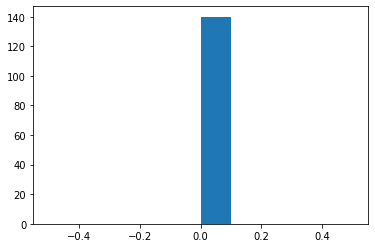

bus vn_kv


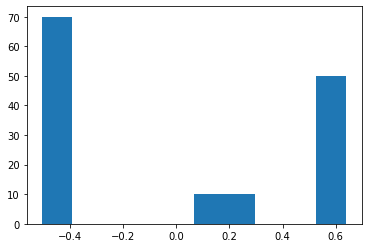

bus res_p_mw


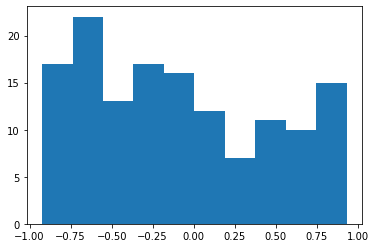

bus in_service


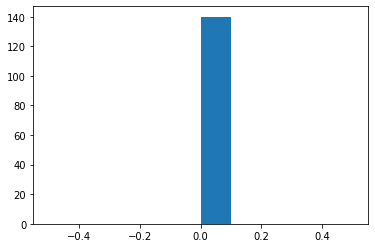

bus res_va_degree


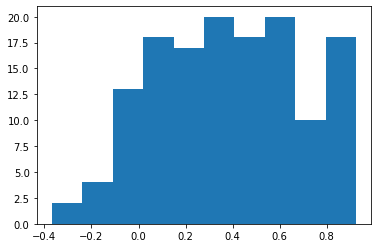

bus res_q_mvar


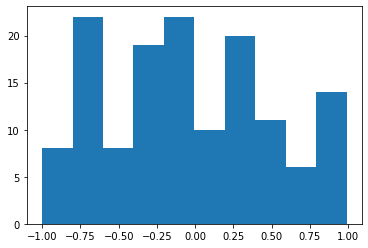

bus max_vm_pu


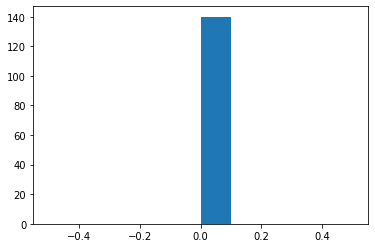

bus res_vm_pu


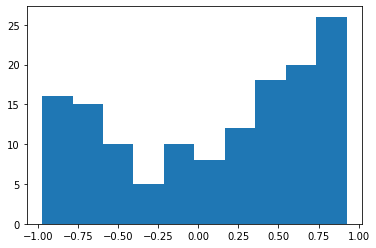

load controllable


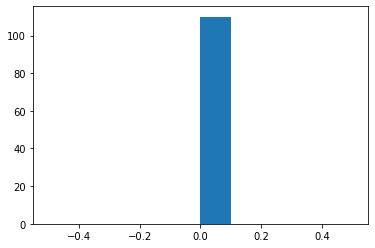

load q_mvar


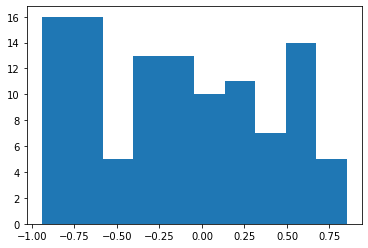

load p_mw


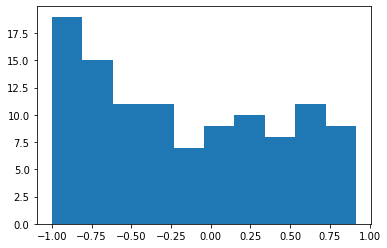

load res_p_mw


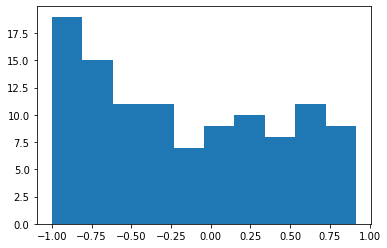

load const_z_percent


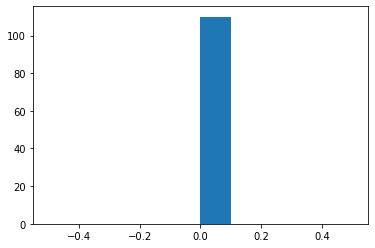

load scaling


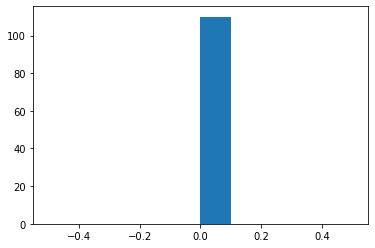

load in_service


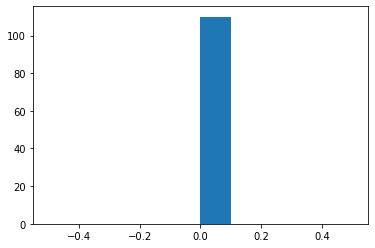

load res_q_mvar


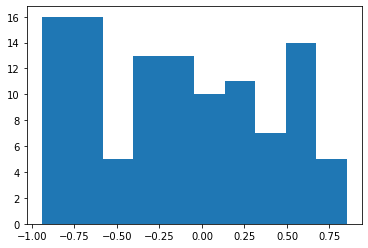

load const_i_percent


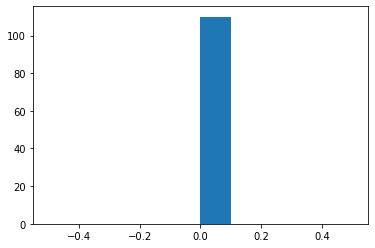

load sn_mva


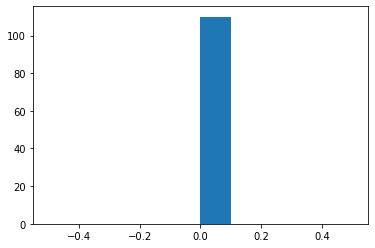

gen controllable


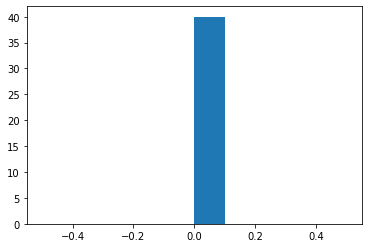

gen vm_pu


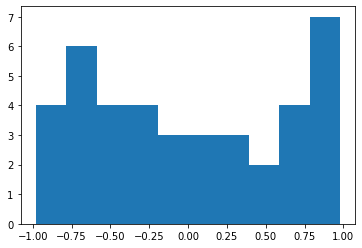

gen max_q_mvar


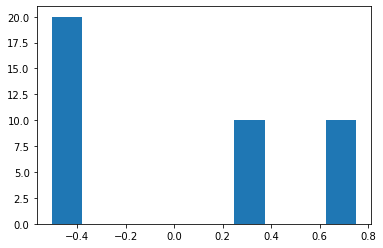

gen min_q_mvar


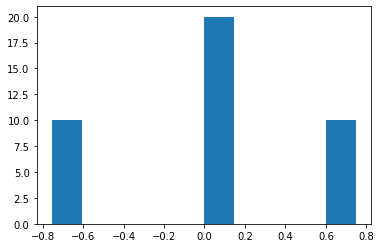

gen p_mw


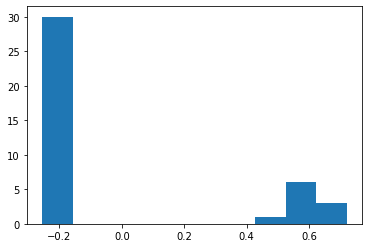

gen slack_weight


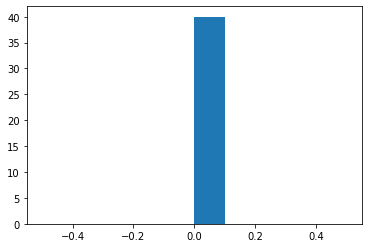

gen res_p_mw


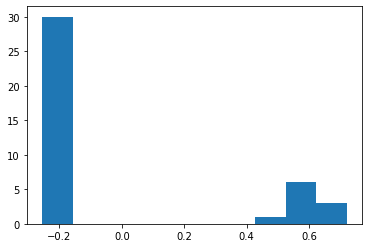

gen scaling


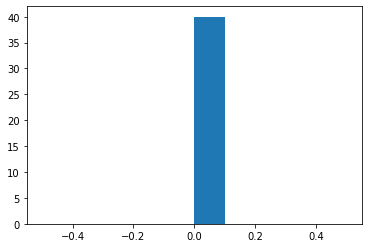

gen min_p_mw


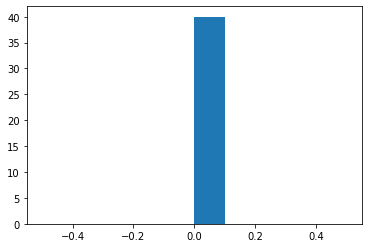

gen in_service


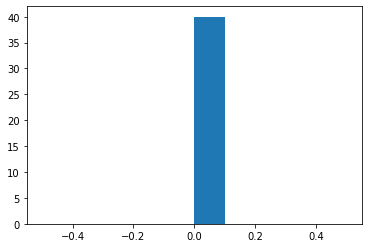

gen slack


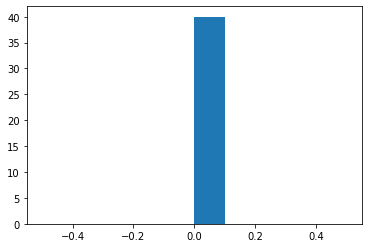

gen res_va_degree


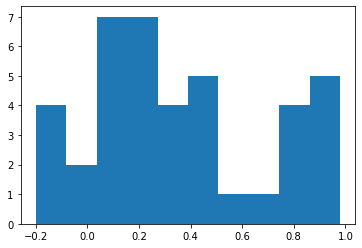

gen res_q_mvar


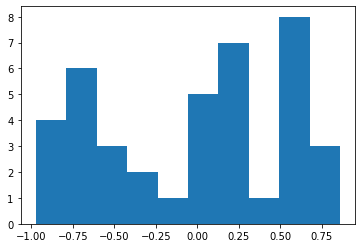

gen sn_mva


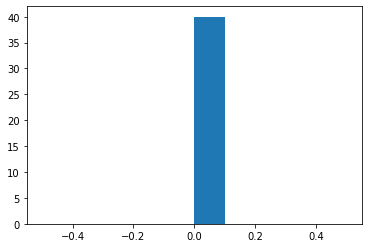

gen max_p_mw


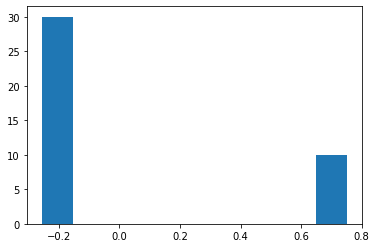

gen res_vm_pu


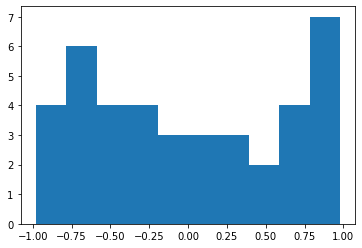

shunt q_mvar


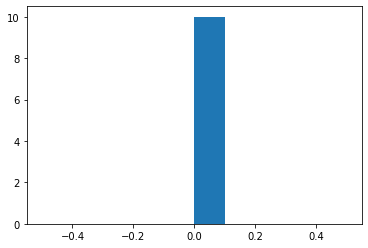

shunt step


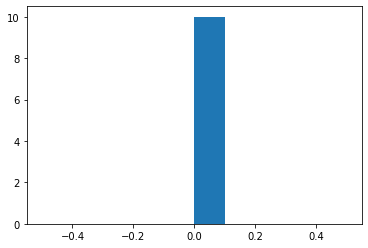

shunt p_mw


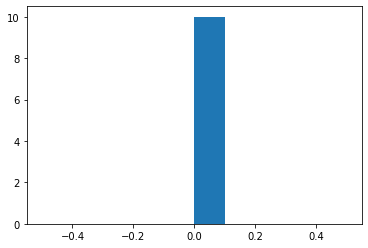

shunt vn_kv


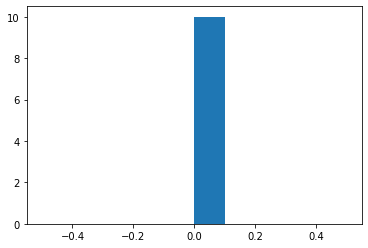

shunt res_p_mw


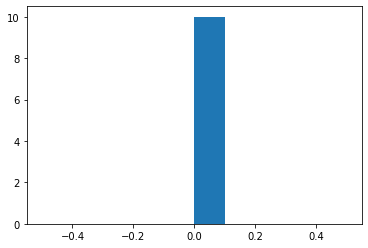

shunt in_service


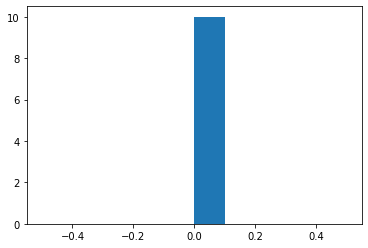

shunt res_q_mvar


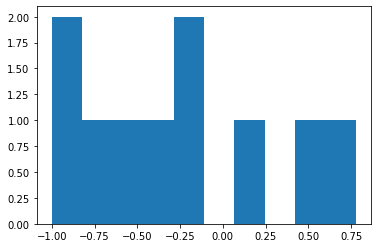

shunt max_step


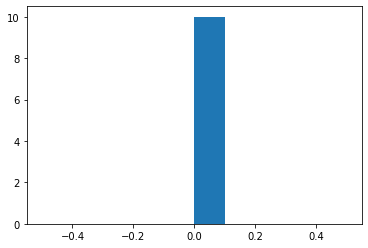

shunt res_vm_pu


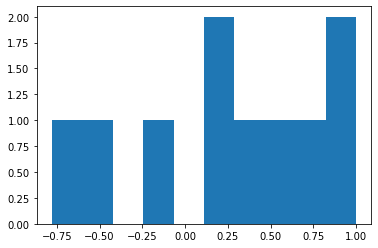

ext_grid vm_pu


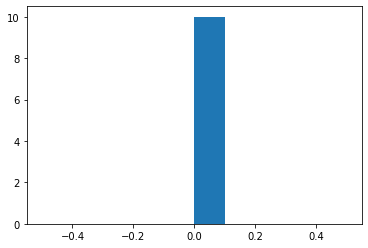

ext_grid max_q_mvar


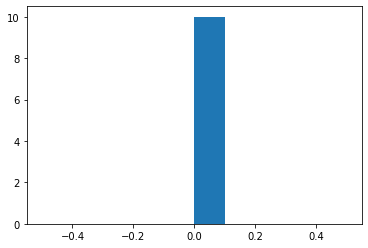

ext_grid min_q_mvar


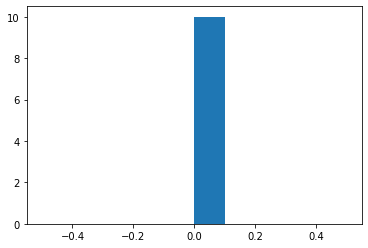

ext_grid slack_weight


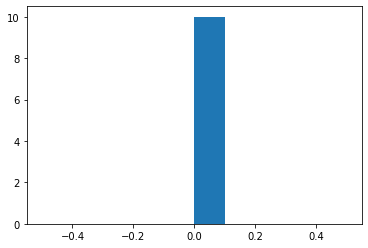

ext_grid res_p_mw


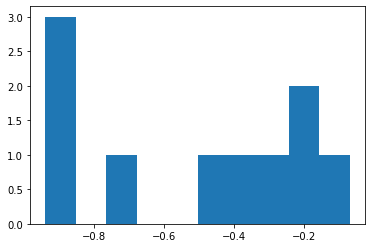

ext_grid min_p_mw


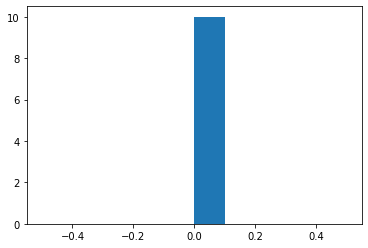

ext_grid va_degree


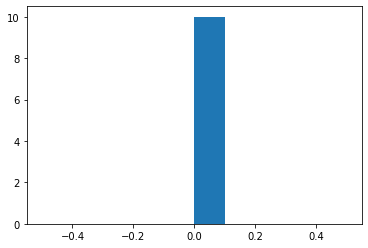

ext_grid in_service


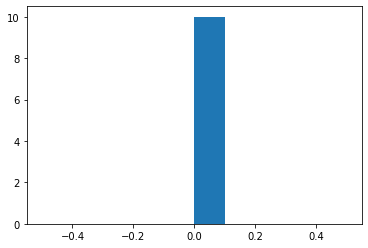

ext_grid res_q_mvar


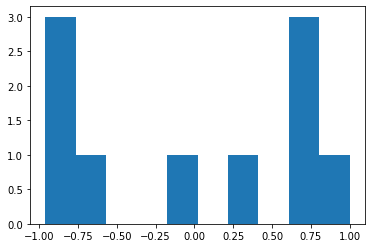

ext_grid max_p_mw


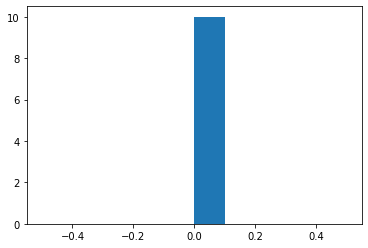

line res_i_ka


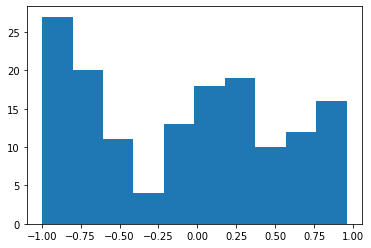

line r_ohm_per_km


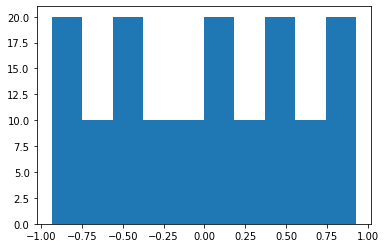

line res_va_from_degree


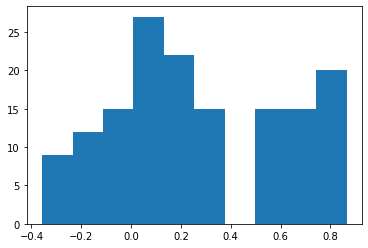

line res_i_to_ka


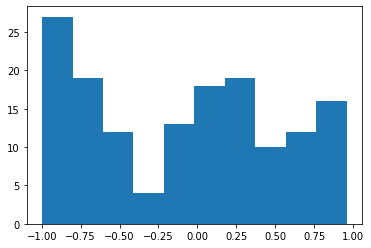

line res_p_from_mw


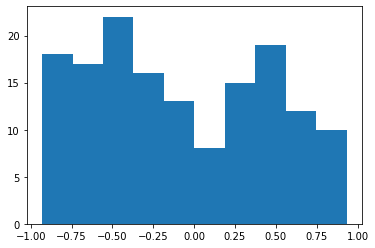

line max_i_ka


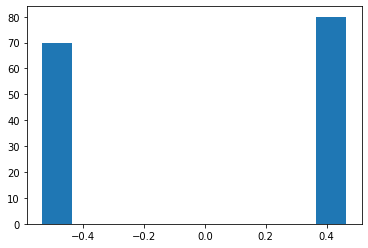

line res_vm_from_pu


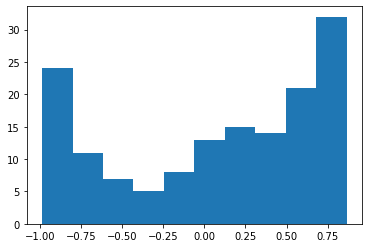

line length_km


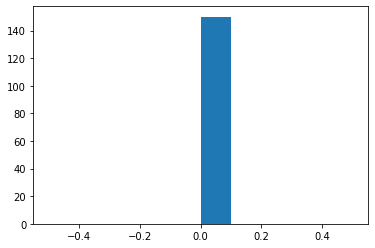

line df


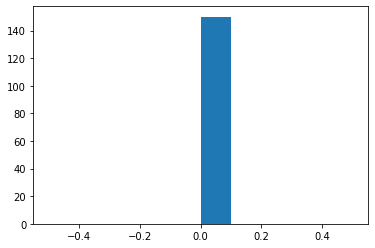

line max_loading_percent


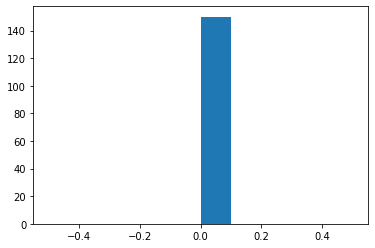

line res_i_from_ka


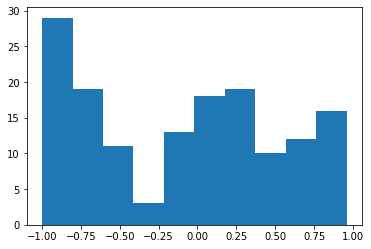

line res_vm_to_pu


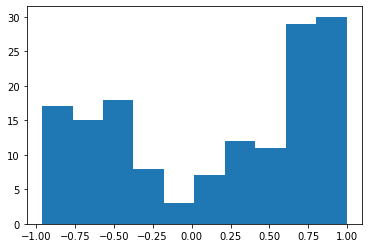

line res_q_to_mvar


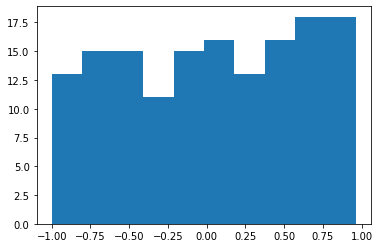

line res_loading_percent


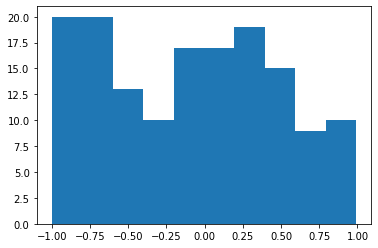

line in_service


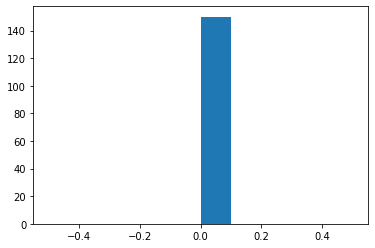

line parallel


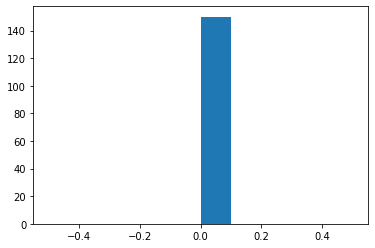

line res_ql_mvar


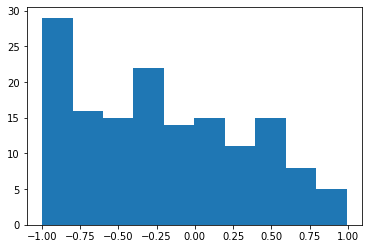

line g_us_per_km


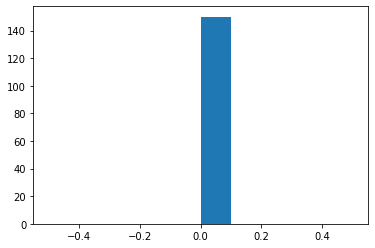

line res_pl_mw


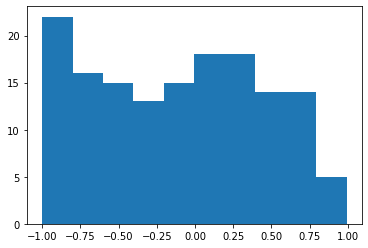

line res_q_from_mvar


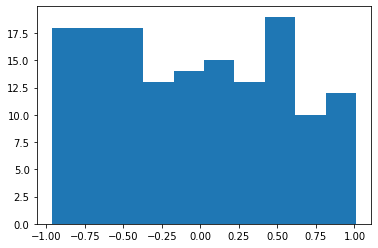

line x_ohm_per_km


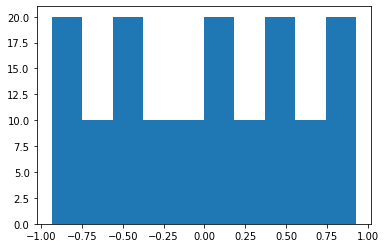

line res_p_to_mw


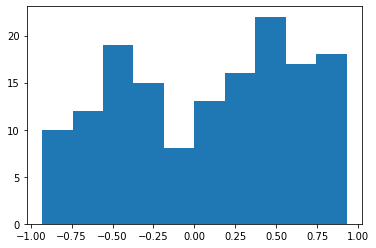

line res_va_to_degree


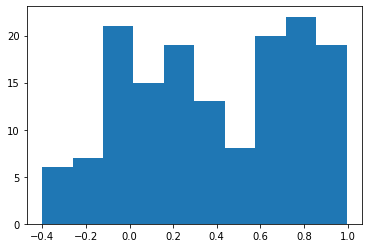

line c_nf_per_km


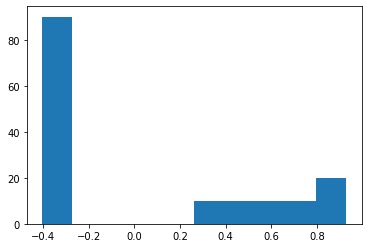

trafo res_vm_hv_pu


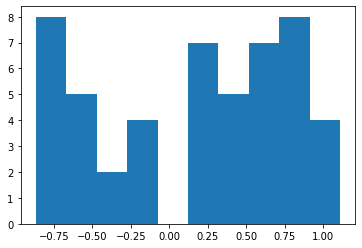

trafo tap_max


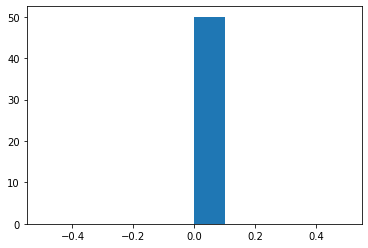

trafo res_va_lv_degree


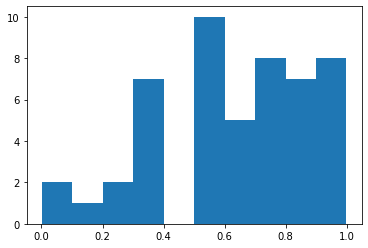

trafo res_q_hv_mvar


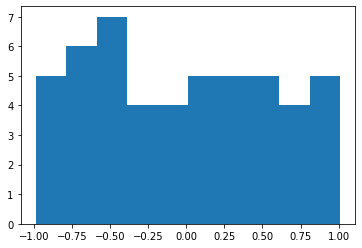

trafo vn_hv_kv


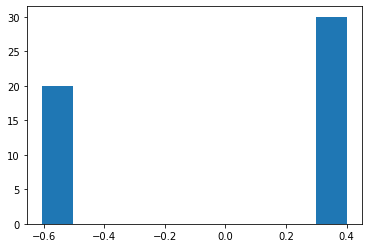

trafo vn_lv_kv


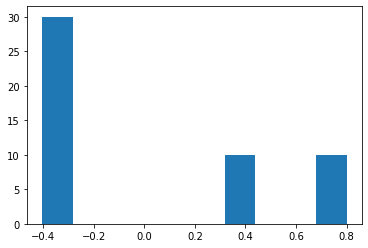

trafo res_i_hv_ka


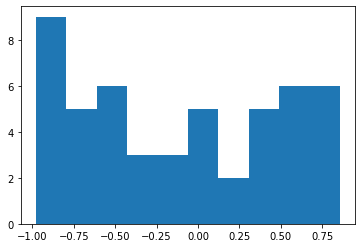

trafo res_i_lv_ka


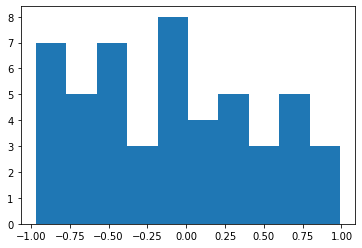

trafo sn_mva


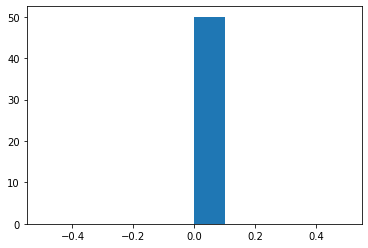

trafo vk_percent


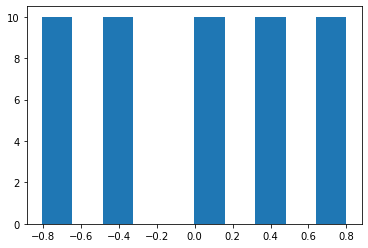

trafo df


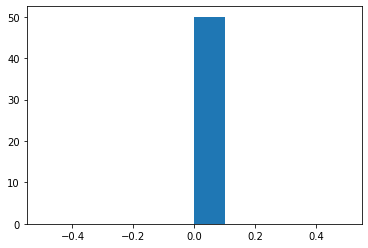

trafo pfe_kw


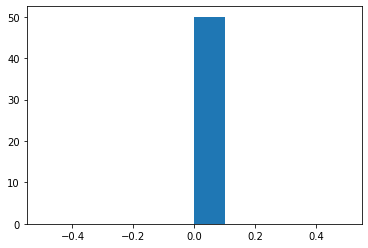

trafo tap_phase_shifter


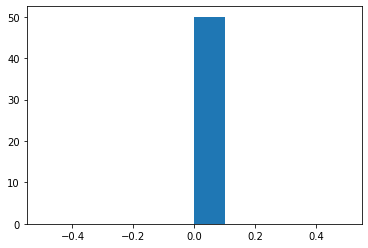

trafo max_loading_percent


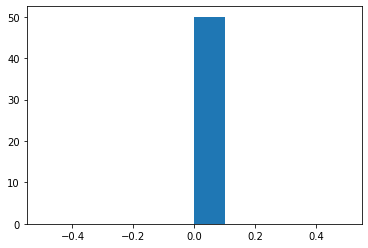

trafo tap_step_percent


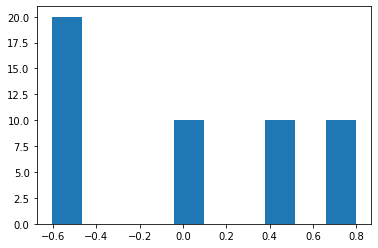

trafo res_p_lv_mw


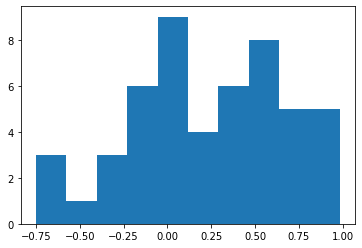

trafo tap_pos


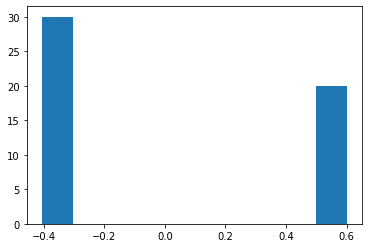

trafo tap_neutral


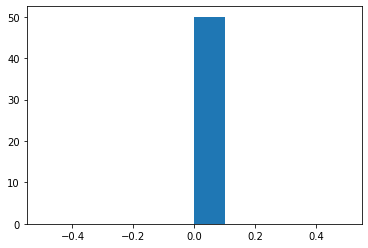

trafo tap_step_degree


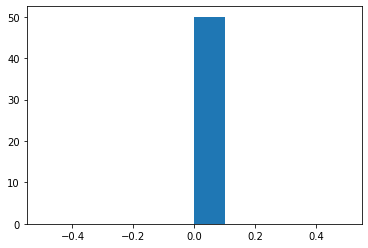

trafo res_vm_lv_pu


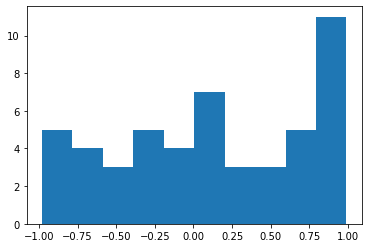

trafo shift_degree


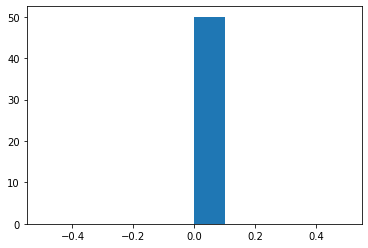

trafo vkr_percent


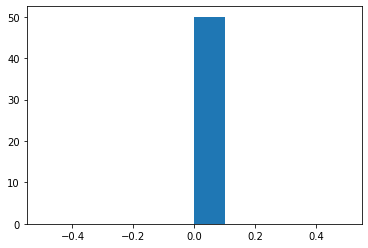

trafo in_service


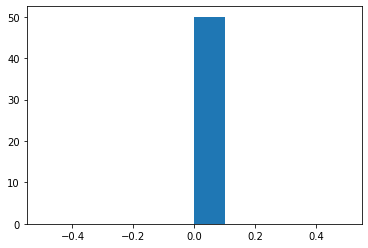

trafo res_p_hv_mw


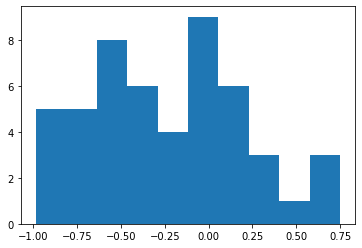

trafo parallel


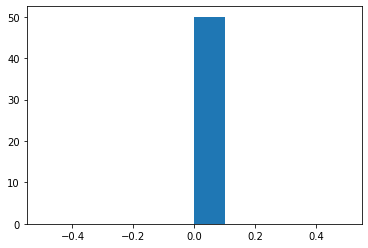

trafo res_ql_mvar


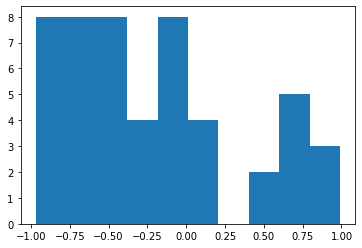

trafo res_q_lv_mvar


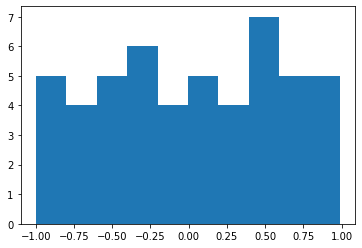

trafo res_pl_mw


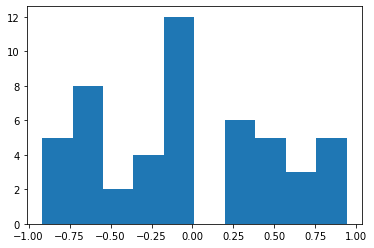

trafo res_va_hv_degree


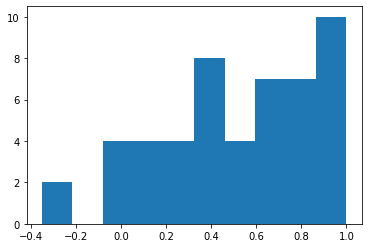

trafo res_loading_percent


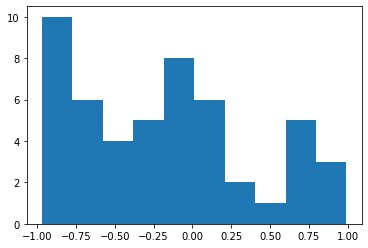

trafo tap_min


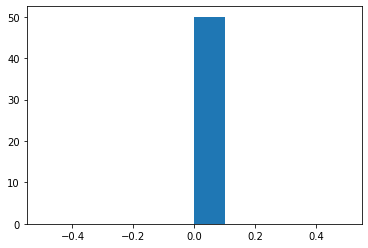

trafo tap_side


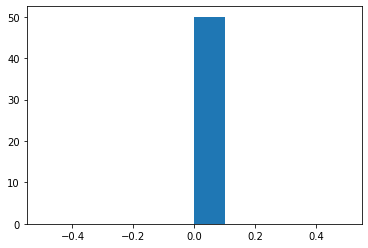

trafo i0_percent


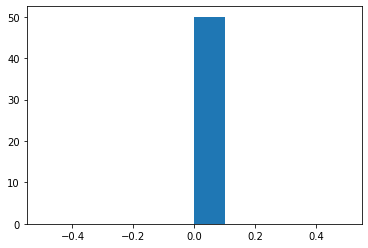

poly_cost cp2_eur_per_mw2


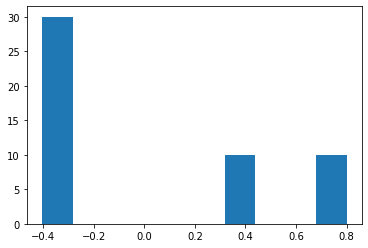

poly_cost cp1_eur_per_mw


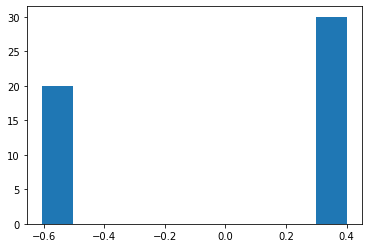

poly_cost cq2_eur_per_mvar2


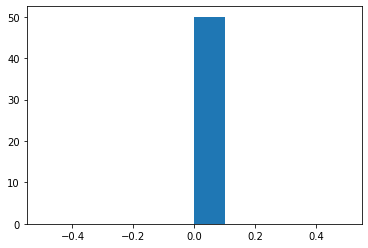

poly_cost cp0_eur


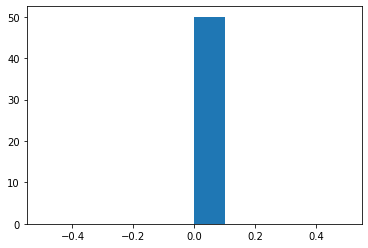

poly_cost cq1_eur_per_mvar


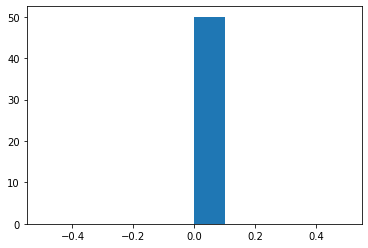

poly_cost cq0_eur


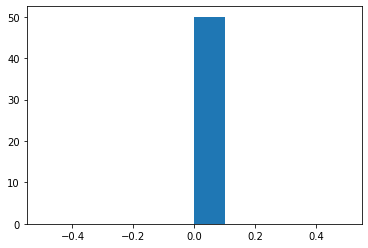

In [16]:
for k in x.keys():
    for f in x[k].keys():
        print(k, f)
        plt.hist(np.reshape(x[k][f], [-1]))
        plt.show()

In [8]:
import pandapower.networks as pn

In [9]:
net = pn.case14()

In [11]:
net.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,135.000,1.0
1,True,1.06,0.94,2,b,135.000,1.0
2,True,1.06,0.94,3,b,135.000,1.0
3,True,1.06,0.94,4,b,135.000,1.0
4,True,1.06,0.94,5,b,135.000,1.0
5,True,1.06,0.94,6,b,0.208,1.0
6,True,1.06,0.94,7,b,14.000,1.0
7,True,1.06,0.94,8,b,12.000,1.0
8,True,1.06,0.94,9,b,0.208,1.0
9,True,1.06,0.94,10,b,0.208,1.0
